In [6]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score #model evaluation

%matplotlib inline

# Wine
Build a model that predicts the alcohol content (variable name: alcohol) based on other variables in the dataset.

1. Explore your data
    - What does alcohol look like? Your chosen Predictor variables?
    - Why did you choose the predictors you did?
2. Build a Predictive Model
    - Why do we standardize our variables?
3. Examine the accuracy of the model
    - What's the mean squared error? What does that mean?
    - What's the r2? What does that mean?
4. Look at the coefficients of the model.
    - What interesting relationships do you see?

In [7]:
wine = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/winequality-red.csv")

In [8]:
# Explore
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


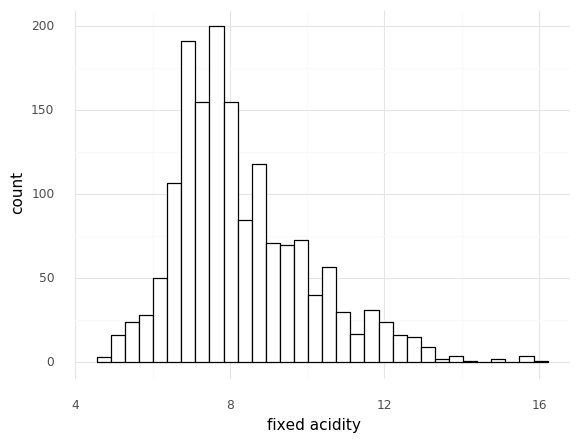

<ggplot: (306240576)>

In [9]:
(ggplot(wine, aes("fixed acidity")) + geom_histogram(fill = "white", color = "black") + theme_minimal())

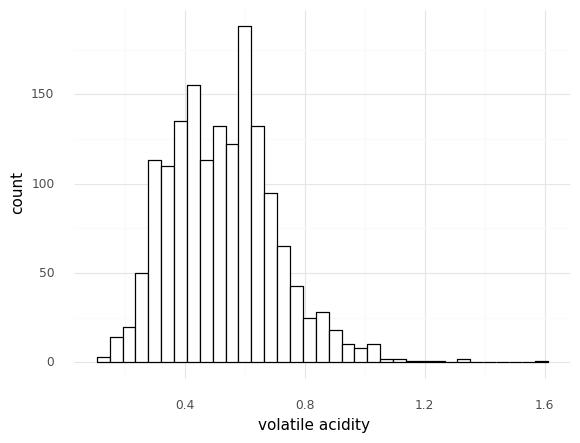

<ggplot: (308460819)>

In [10]:
(ggplot(wine, aes("volatile acidity")) + geom_histogram(fill = "white", color = "black") + theme_minimal())

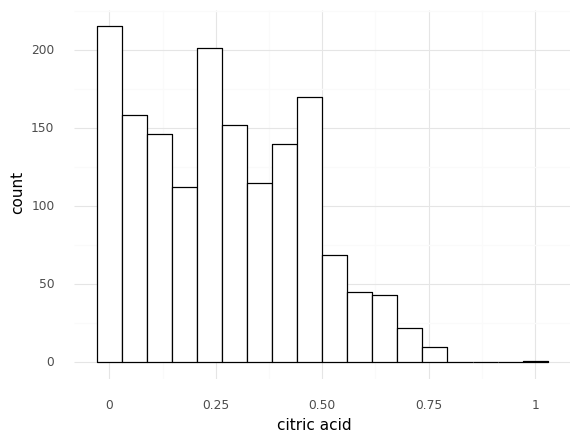

<ggplot: (308696040)>

In [11]:
(ggplot(wine, aes("citric acid")) + geom_histogram(fill = "white", color = "black") + theme_minimal())

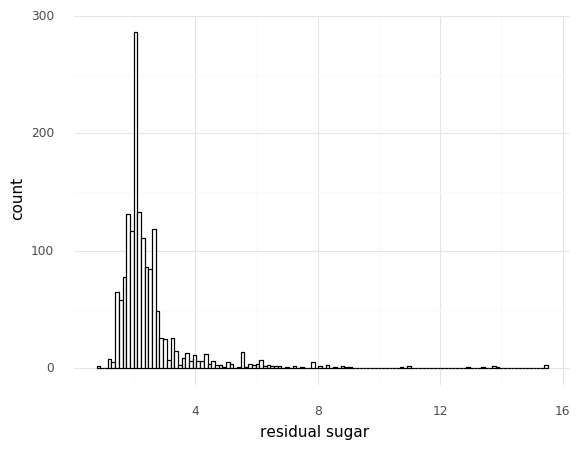

<ggplot: (308716051)>

In [12]:
(ggplot(wine, aes("residual sugar")) + geom_histogram(fill = "white", color = "black") + theme_minimal())

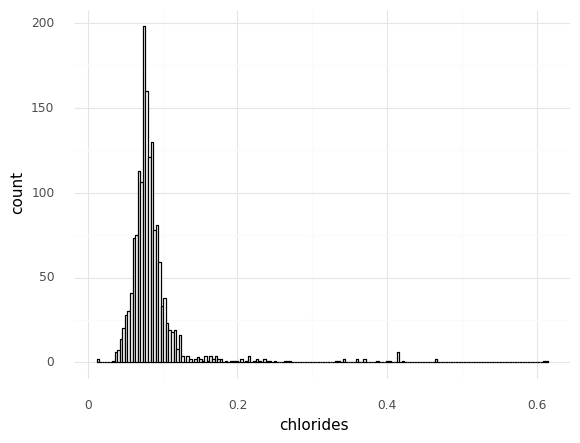

<ggplot: (308779749)>

In [13]:
(ggplot(wine, aes("chlorides")) + geom_histogram(fill = "white", color = "black") + theme_minimal())

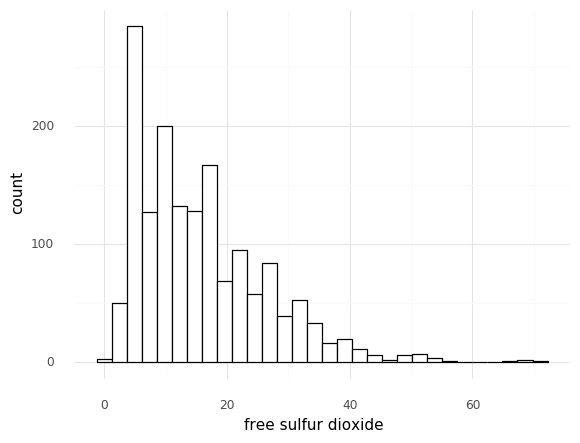

<ggplot: (308739082)>

In [14]:
(ggplot(wine, aes("free sulfur dioxide")) + geom_histogram(fill = "white", color = "black") + theme_minimal())

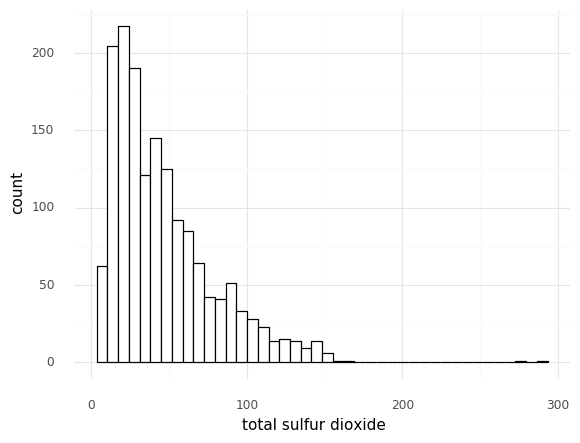

<ggplot: (308704765)>

In [15]:
(ggplot(wine, aes("total sulfur dioxide")) + geom_histogram(fill = "white", color = "black") + theme_minimal())

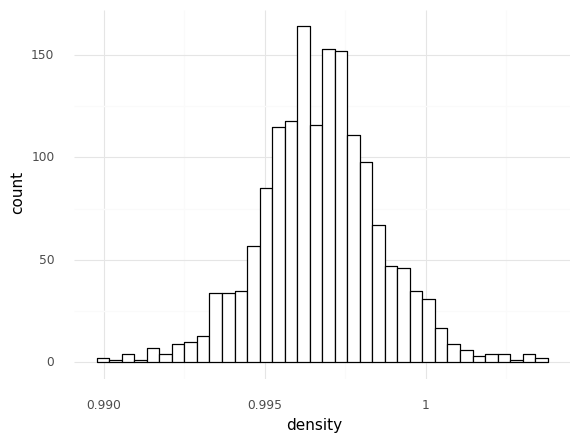

<ggplot: (308886791)>

In [16]:
(ggplot(wine, aes("density")) + geom_histogram(fill = "white", color = "black") + theme_minimal())

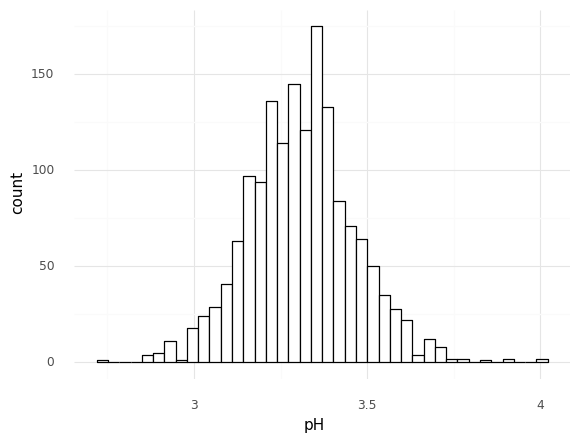

<ggplot: (309053742)>

In [17]:
(ggplot(wine, aes("pH")) + geom_histogram(fill = "white", color = "black") + theme_minimal())

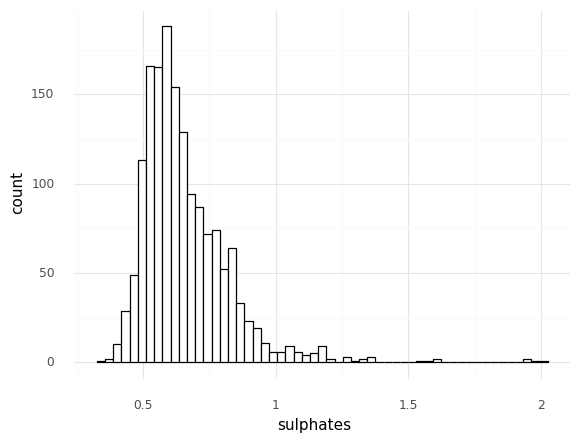

<ggplot: (309070011)>

In [18]:
(ggplot(wine, aes("sulphates")) + geom_histogram(fill = "white", color = "black") + theme_minimal())

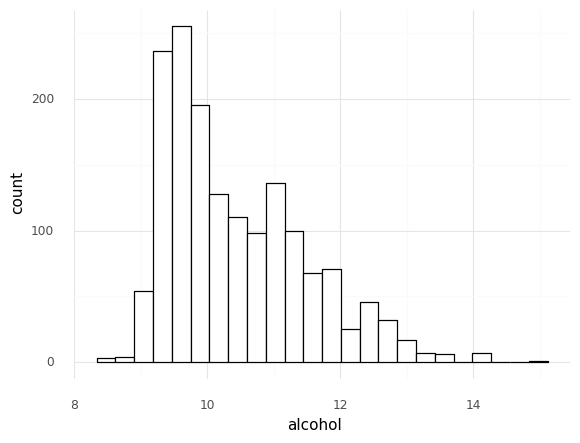

<ggplot: (309064388)>

In [19]:
(ggplot(wine, aes("alcohol")) + geom_histogram(fill = "white", color = "black") + theme_minimal())

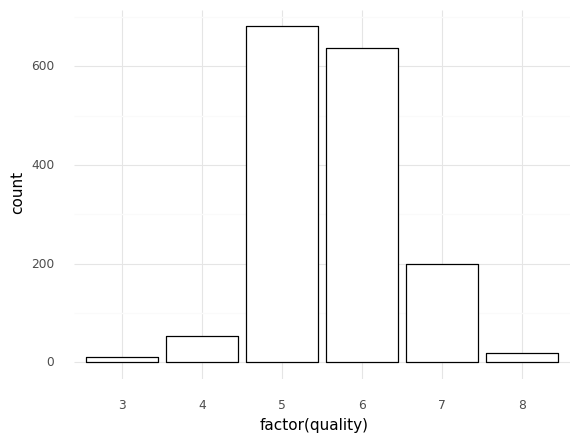

<ggplot: (309455833)>

In [21]:
(ggplot(wine, aes("factor(quality)")) + geom_bar(fill = "white", color = "black") + theme_minimal())

In [22]:
# Model
predictors = ["residual sugar", "pH", "density","volatile acidity"]
X = wine[predictors]
zscore = StandardScaler()
zscore.fit(X)
Xz = zscore.transform(X)

Y = wine["alcohol"]

W = LinearRegression()
W.fit(Xz,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Model Performance
wine_pred = W.predict(Xz)

W.score(Xz,Y) #r2

#this is pretty low...

0.34336117099851127

In [25]:
mean_squared_error(Y, wine_pred) #MSE

0.7452438152767356

In [29]:
# Coefficients
coef = pd.DataFrame({"Coef": W.coef_, "Name": predictors})
coef = coef.append({"Coef": W.intercept_, "Name": "intercept"}, ignore_index = True)
coef

,Coef,Name
0,0.260827,residual sugar
1,0.094856,pH
2,-0.583887,density
3,-0.225429,volatile acidity
4,10.422983,intercept
